# Code

In [ ]:
!pip install diffusers transformers accelerate

import torch
import os
from diffusers import StableDiffusionPipeline
from zipfile import ZipFile
from IPython.display import clear_output
from google.colab.patches import cv2_imshow

def dreamlike_photoreal(r, prompt, image_name):
  with ZipFile("result.zip", "a") as myzip:
    prompt = "photo realism, photo, bright cinematic lighting, gopro, bokeh effect, one person" + prompt
    for x in range(int(r)):
      image_name = image_name + 1
      image_name_str = str(image_name)
      print(f"Picture number: {image_name_str} from {r}")
      model_id = "dreamlike-art/dreamlike-photoreal-2.0"
      pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
      pipe = pipe.to("cuda")
      image = pipe(prompt, height=1024, width=768).images[0]
      image.save(f"{image_name_str}.jpg")
      myzip.write(f"{image_name_str}.jpg")
      os.remove(f"{image_name_str}.jpg")
  myzip.close()

def dreamlike_anime(r, prompt, image_name):
  with ZipFile("result.zip", "a") as myzip:
    prompt = "photo anime, masterpiece, high quality, absurdres, " + prompt
    negative_prompt = 'simple background, duplicate, retro style, low quality, lowest quality, 1980s, 1990s, 2000s, 2005 2006 2007 2008 2009 2010 2011 2012 2013, bad anatomy, bad proportions, extra digits, lowres, username, artist name, error, duplicate, watermark, signature, text, extra digit, fewer digits, worst quality, jpeg artifacts, blurry' + negative_prompt
    for x in range(int(r)):
      image_name = image_name + 1
      image_name_str = str(image_name)
      print(f"Picture number: {image_name_str} from {r}")
      model_id = "dreamlike-art/dreamlike-anime-1.0"
      pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
      pipe = pipe.to("cuda")
      image = pipe(prompt, negative_prompt=negative_prompt, height=832, width=704).images[0]
      image.save(f"{image_name_str}.jpg")
      myzip.write(f"{image_name_str}.jpg")
      os.remove(f"{image_name_str}.jpg")
  myzip.close()

def dreamlike_diffusion(r, prompt, image_name):
  with ZipFile("result.zip", "a") as myzip:
    prompt = "dreamlikeart, dynamic pose, crisp lines and color, complex background, particles, lines, concept art, sharp focus, vivid colors" + prompt
    for x in range(int(r)):
      image_name = image_name + 1
      image_name_str = str(image_name)
      print(f"Picture number: {image_name_str} from {r}")
      model_id = "dreamlike-art/dreamlike-diffusion-1.0"
      pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
      pipe = pipe.to("cuda")
      image = pipe(prompt, height=768, width=512).images[0]
      image.save(f"{image_name_str}.jpg")
      myzip.write(f"{image_name_str}.jpg")
      os.remove(f"{image_name_str}.jpg")
  myzip.close()

def run():
  clear_output()
  image_name = 0
  message_1 = "Choose one of the models\n1:dreamlike-photoreal-2.0\n2:dreamlike-anime-1.0\n3:dreamlike-diffusion-1.0"
  message_2 = "What should be in the photo?\nExample:girl, happy, ..\nprompt:"
  message_2_5 = "What should not be in the photo?\nExample:gore, sad, ..\nnegative_prompt:"
  message_3 = "Enter the number of images you want to receive:"
  print(message_1)
  model = input("Model number:")
  if model == "1":
    prompt = input(message_2)
    r = input(message_3)
    dreamlike_photoreal(r, prompt, image_name)
  elif model == "2":
    prompt = input(message_2)
    negative_prompt = input(message_2_5)
    r = input(message_3)
    dreamlike_anime(r, prompt, negative_prompt, image_name)
  elif model == "3":
    prompt = input(message_2)
    r = input(message_3)
    dreamlike_diffusion(r, prompt, image_name)
  else:
    return run()
  clear_output()
  print("Generation was successful! You can download your result: result.zip")
run()

# How to use

**Step number 1:**

Go to edit tab => Notebook settings and add Hardware accelerator GPU => Save

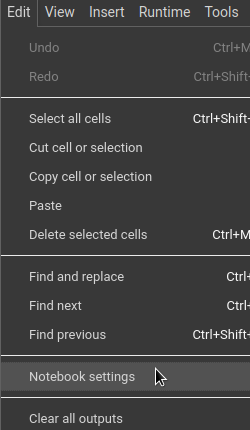
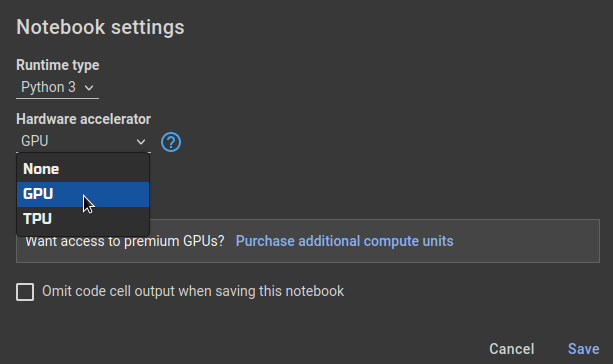

**Step number 2:**

Run the cell with the code

**Step number 3:**

After the completion of the code execution, we will have the file "result.zip"

This is an archive with our result, download it and open it

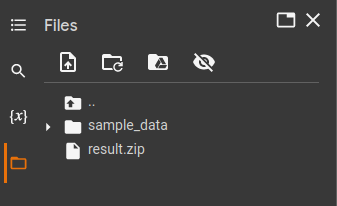

# Information about models

**Model number 1**: **dreamlike-photoreal-2.0**

**Feature**: This model was trained on 768x768px images, so use 768x768px, 640x896px, 896x640px, etc. It also works pretty good with higher resolutions such as 768x1024px or 1024x768px (**Set to 1024x768px**). Takes realistic photos.

**Example**:

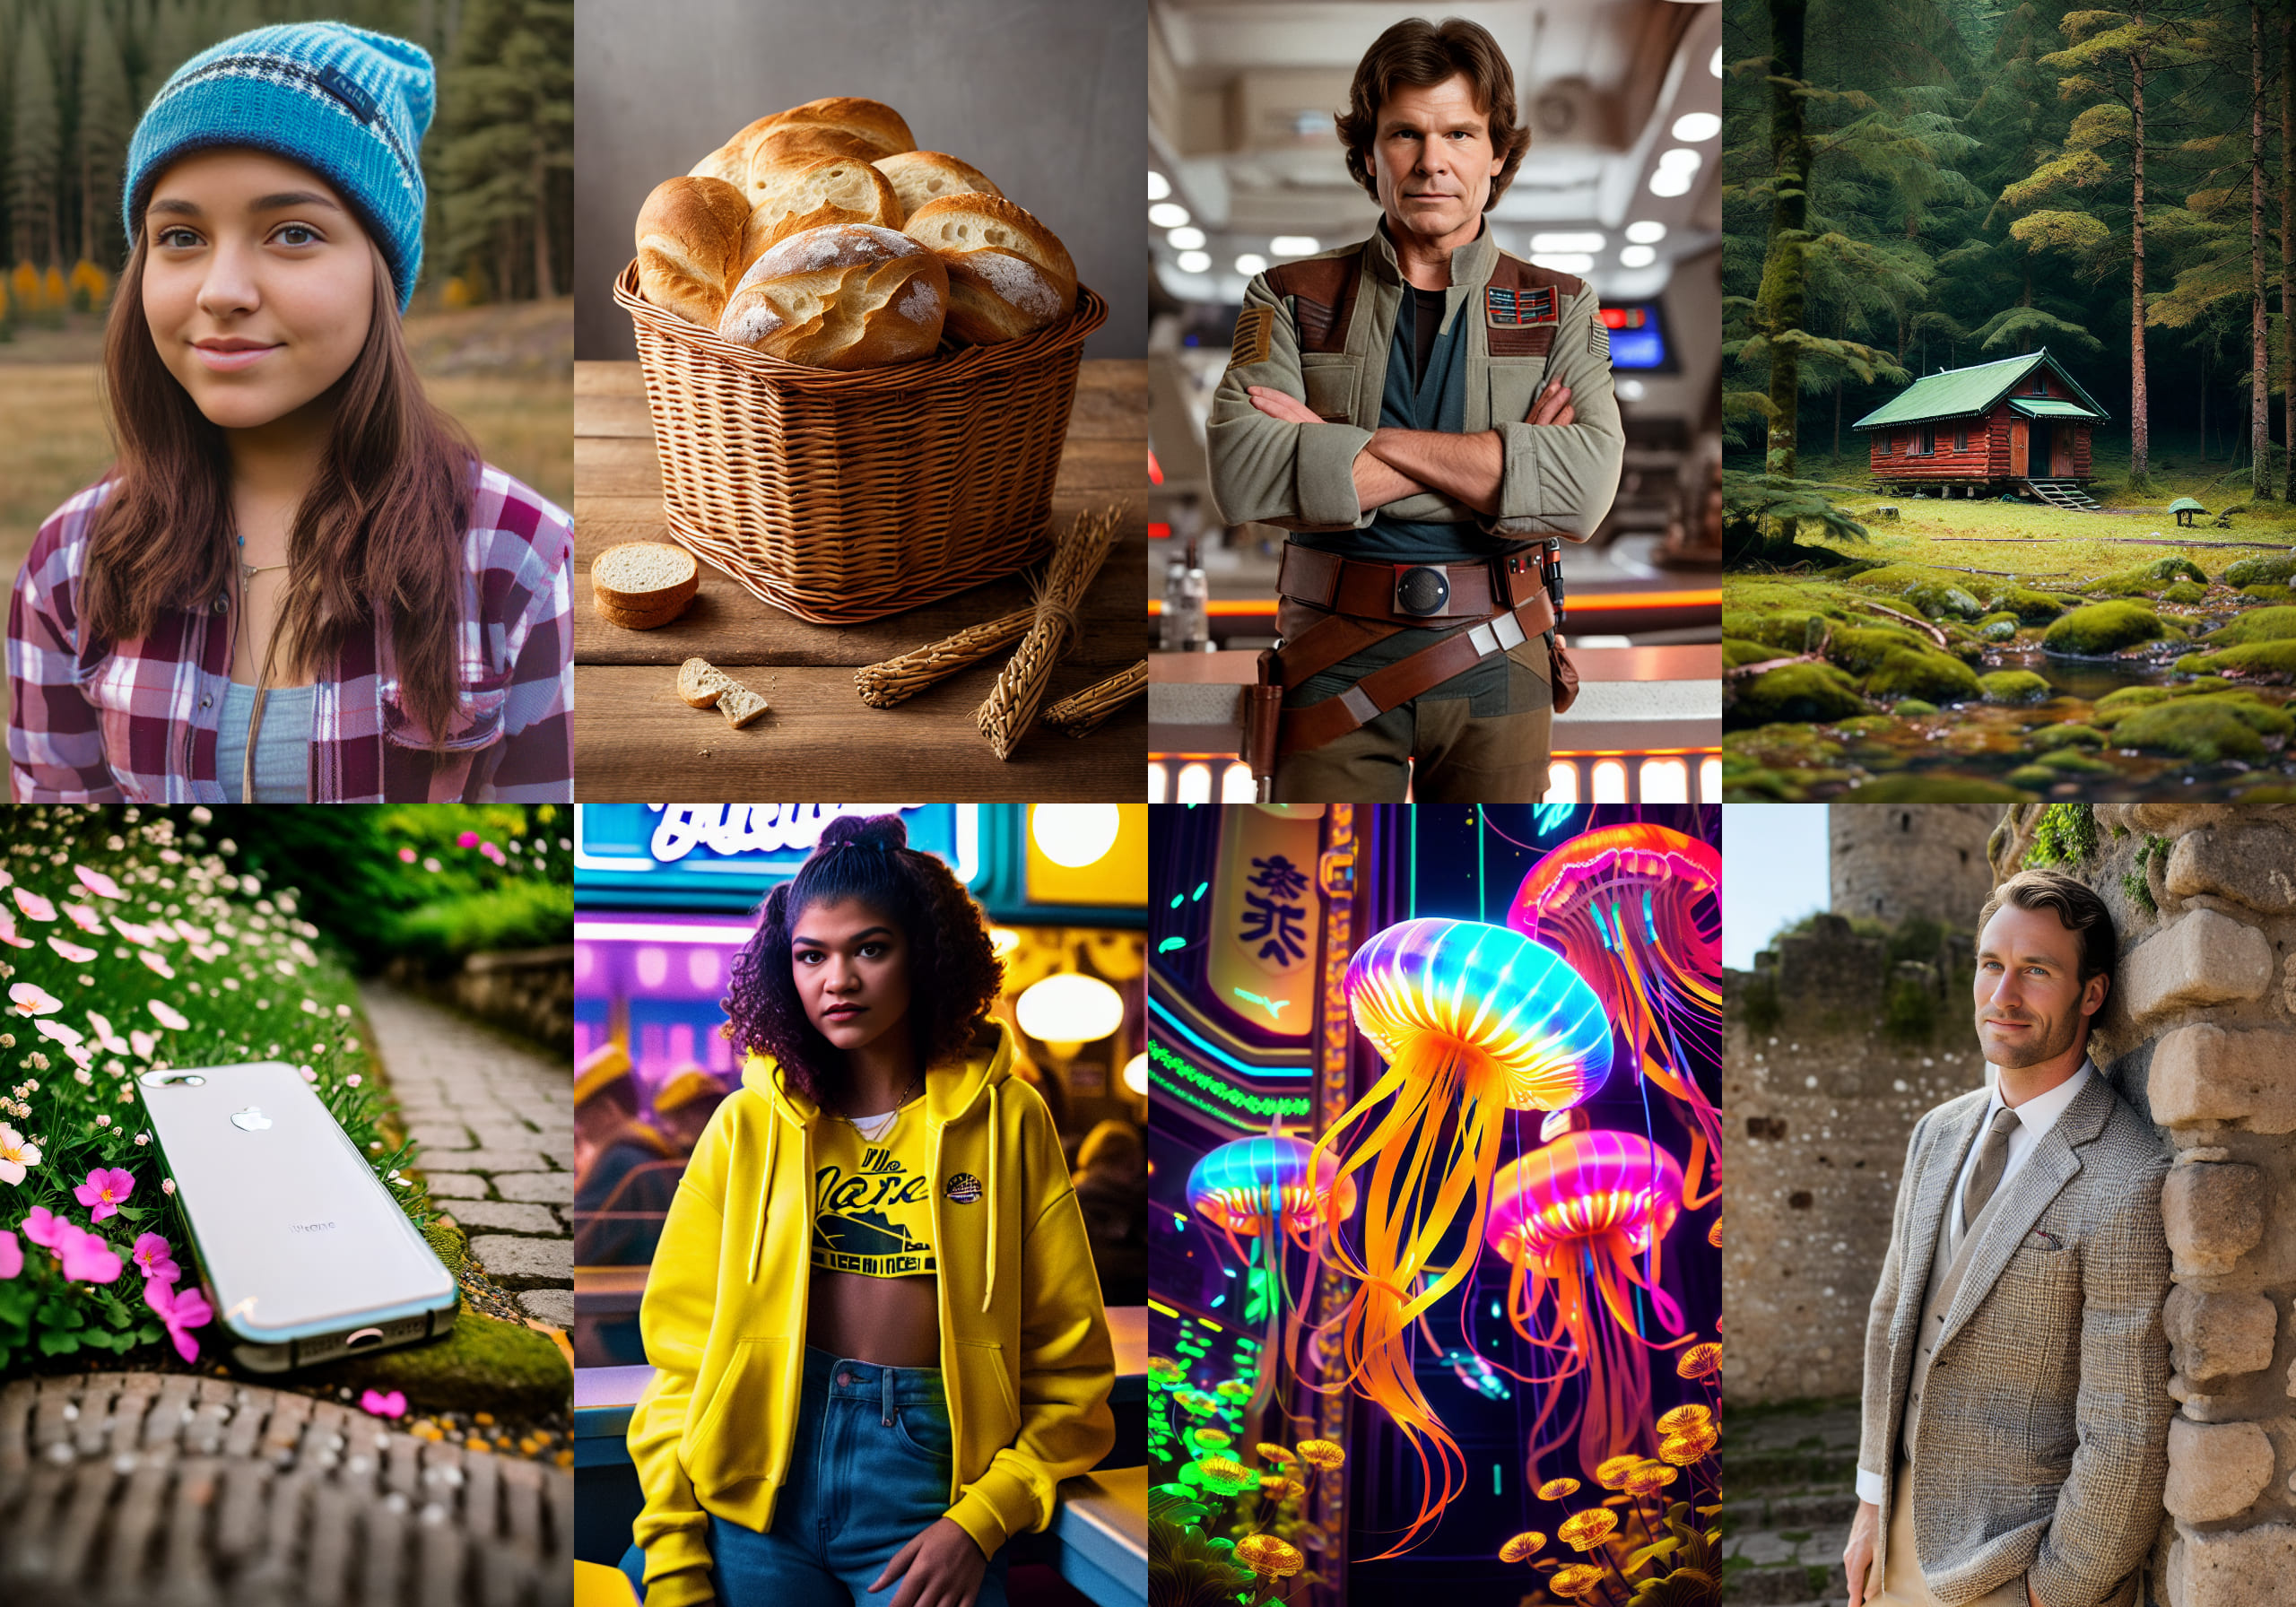

**Model number 2**: **dreamlike-anime-1.0**

**Feature**: This model was trained on 768x768px images, so use 768x768px, 704x832px, 832x704px, etc. Higher resolution or non-square aspect ratios may produce artifacts (**Set to 832x704px**). Makes an anime image

**Example**:

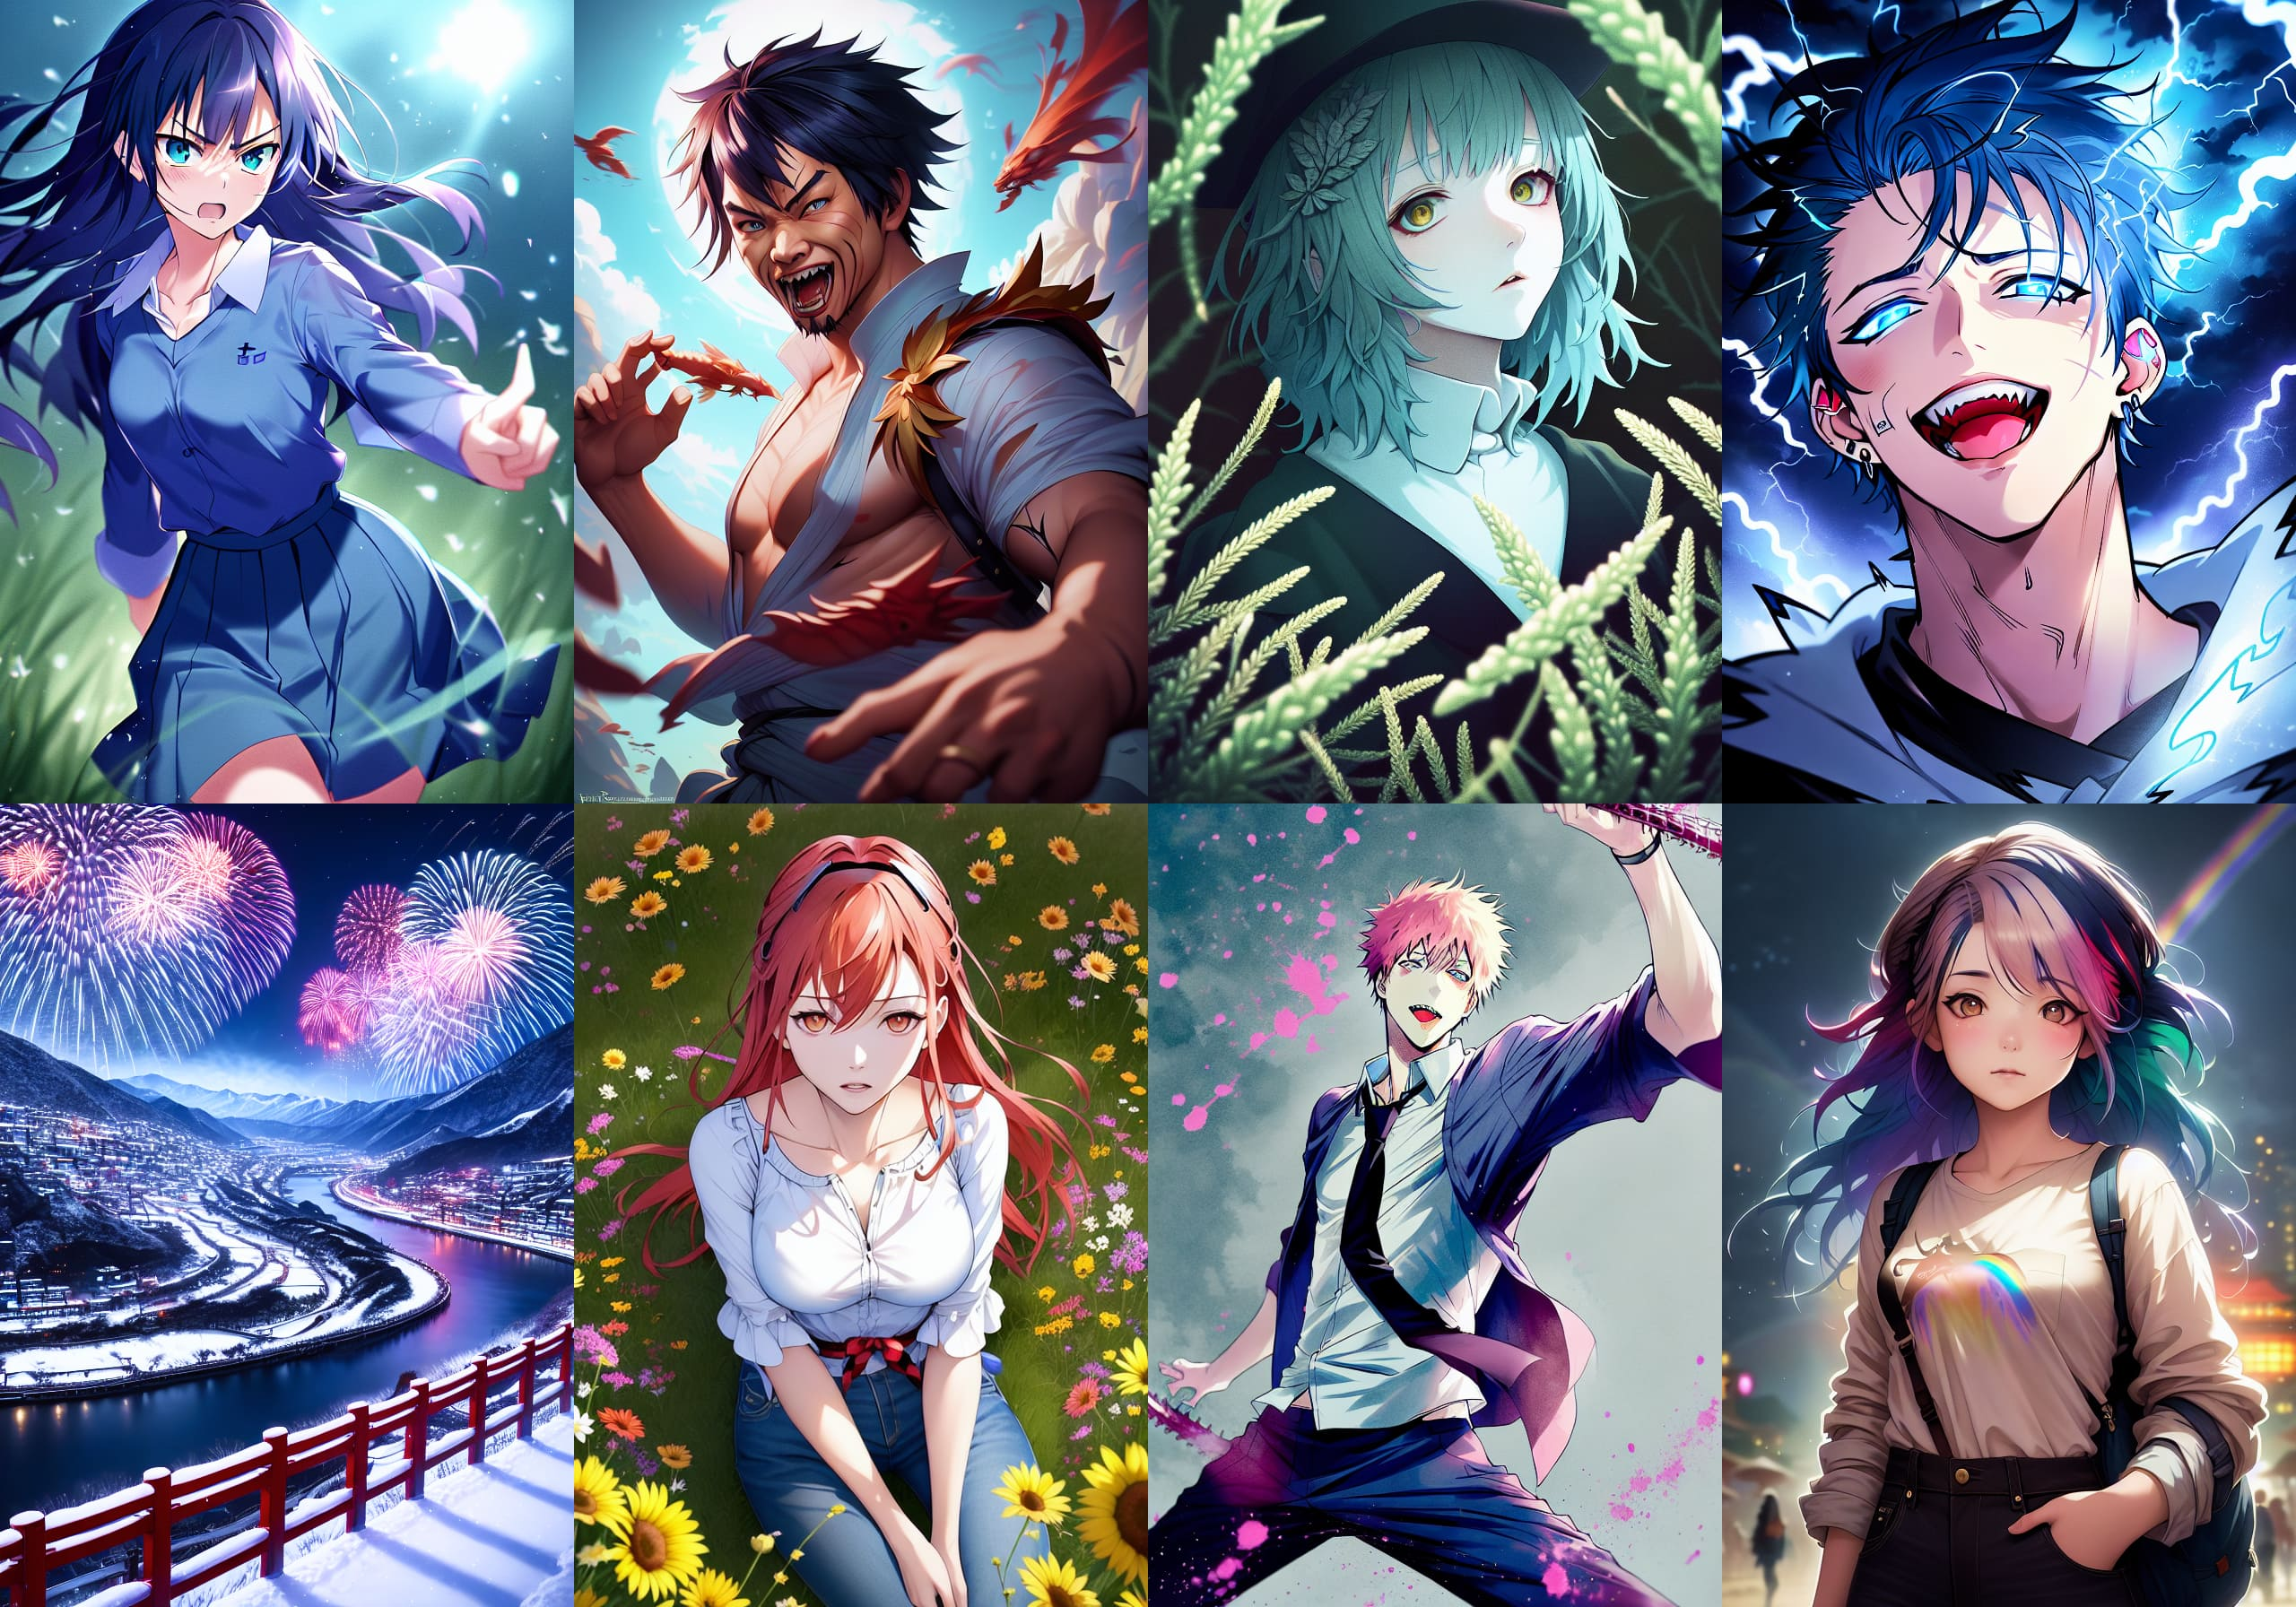

**Model number 3**: **dreamlike-diffusion-1.0**

**Feature**:This model was trained on 640x640px, 512x768px, 768x512px, etc. Higher resolution or non-square aspect ratios may produce artifacts (**Set to 768x512px**). 

**Example**:

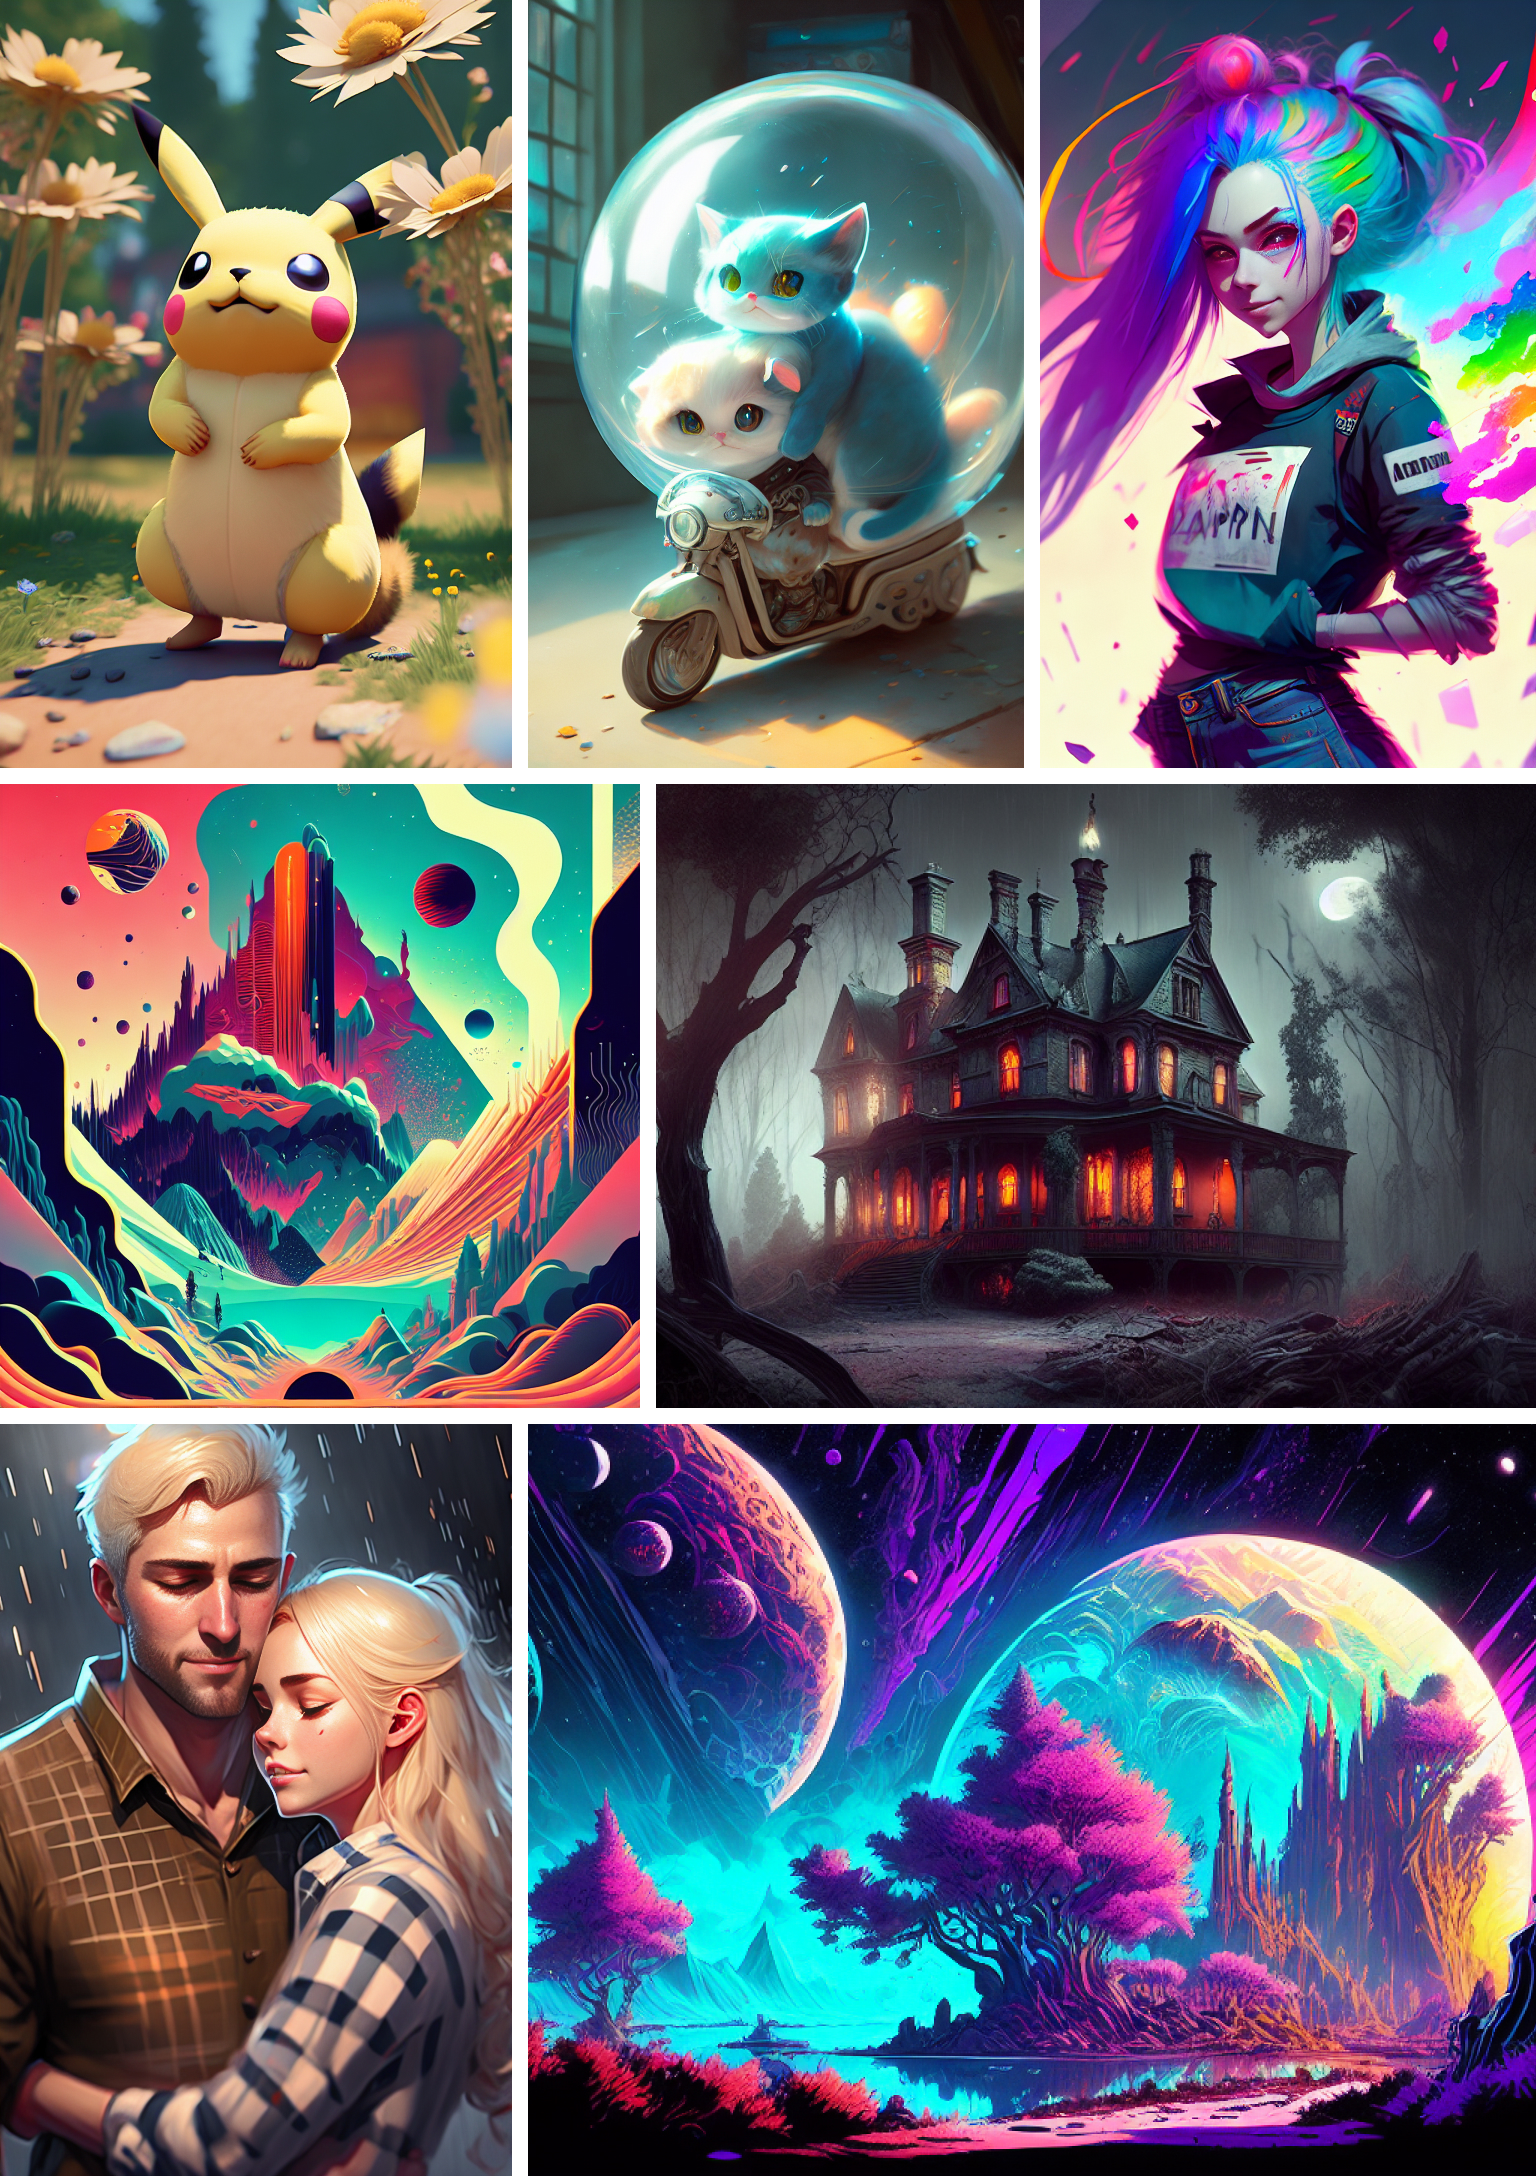



# License Models

This model is licesed under a modified CreativeML OpenRAIL-M license.

You can't host or use the model or its derivatives on websites/apps/etc., from which you earn, will earn, or plan to earn revenue or donations. If you want to, please email us at contact@dreamlike.art You are free to host the model card and files (Without any actual inference or finetuning) on both commercial and non-commercial websites/apps/etc. Please state the full model name (Dreamlike Diffusion 1.0) and include a link to the model card (https://huggingface.co/dreamlike-art/dreamlike-diffusion-1.0) You are free to host the model or its derivatives on completely non-commercial websites/apps/etc (Meaning you are not getting ANY revenue or donations). Please state the full model name (Dreamlike Diffusion 1.0) and include a link to the model card (https://huggingface.co/dreamlike-art/dreamlike-diffusion-1.0) You are free to use the outputs of the model or the outputs of the model's derivatives for commercial purposes in teams of 10 or less You can't use the model to deliberately produce nor share illegal or harmful outputs or content The authors claims no rights on the outputs you generate, you are free to use them and are accountable for their use which must not go against the provisions set in the license You may re-distribute the weights. If you do, please be aware you have to include the same use restrictions as the ones in the license and share a copy of the modified CreativeML OpenRAIL-M to all your users (please read the license entirely and carefully) Please read the full license here: https://huggingface.co/dreamlike-art/dreamlike-diffusion-1.0/blob/main/LICENSE.md

# Other

**My github repository:**https://github.com/DonteBoy/Ai_IMG_GEN